# PCA Homework

2021.4.13

**本次作业将在MNIST手写数字数据集上实现PCA降维及聚类** 
  


⭐ **train_X.csv**: 存放了mnist数据集的data结果，若下载太慢可直接导入


⭐ **train_y.csv**: 存放了mnist数据集的target结果，若下载太慢可直接导入


### 1.通过**sklearn**库下载mnist数据集

可以通过`conda install scikit-learn`安装该库

In [1]:
import sklearn
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

# mnist=fetch_openml('mnist_784',version=1,cache=True)
X = pd.read_csv('./train_X.csv')
y = pd.read_csv('./train_y.csv')

X = np.array(X)
y = np.array(y)

X = X[:6000, :] # 取前6000个样本
y = y[:6000]
y = np.squeeze(y)

(X.shape, y.shape)

((6000, 784), (6000,))

### 2.对mnist数据集进行PCA降维
可以通过调用`sklearn`库的函数实现，也可以自己实现PCA操作

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)

### 3.画出前12个特征向量所对应的(28, 28)维度的特征图像。
*（提示：将PCA降维后的特征向量转回原始图像的shape来显示）*

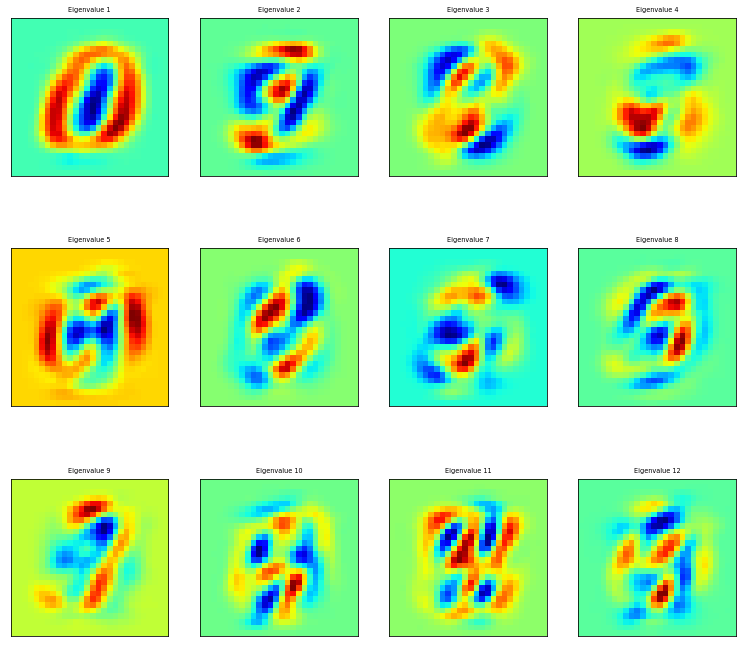

In [3]:
import matplotlib.pyplot as plt
pca = PCA(n_components=12).fit(X)
eigenvalues = pca.components_.reshape(12, 28, 28)

plt.figure(figsize=(13,12))
for i in range(12):
    plt.subplot(3, 4, i + 1) #row, col
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    plt.title('Eigenvalue ' + str(i + 1), size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

### 4.使用PCA降维到2维，绘制散点图，颜色是它们相应的真实label
散点图和序号标记可以参考[blog](https://blog.csdn.net/weixin_40198632/article/details/78455886)，可以考虑同类别数据点每50个标记一次，不用每个都标记

In [4]:
# Call the PCA method with 5 components. 
pca = PCA(n_components=2)
pca.fit(X_std)
X_2D = pca.transform(X_std)
X_2D

array([[ -0.92358868,  -4.72863949],
       [  8.6685034 ,  -7.08184738],
       [  2.18462625,  10.65616287],
       ...,
       [ -2.00963265, -10.08238771],
       [  0.96415227,  -2.95969224],
       [ -2.09579785,   0.25069527]])

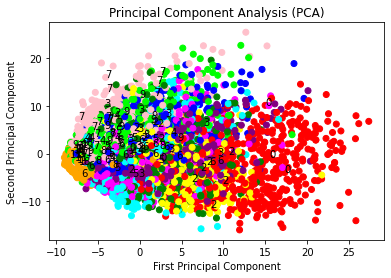

In [5]:
x = X_2D[:,0]
z = X_2D[:,1]
color = ['red','orange','yellow','green','blue','magenta','purple','pink','cyan','lime']
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.scatter(x,z,c=[color[x] for x in y])
for i in range(0,len(x),50):
    plt.annotate(y[i],(x[i],z[i]))


### 5.将数据通过PCA方法降到2维，使用kmeans方法对其进行聚类，绘制聚类后的分类图
聚类为3类，绘制分类图观察结果并计算[ARI](https://sklearn.org/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)（调整兰德指数），使用`sklearn.metrics.adjusted_rand_score()`函数可计算该指数

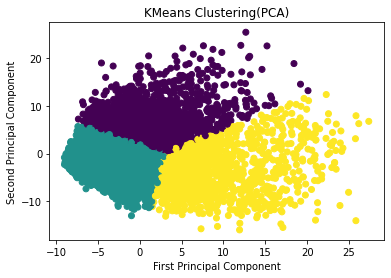

ARI=0.06576113636275069


In [6]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
X_clustered = kmeans.fit_predict(X_2D)
plt.scatter(x,z,c=X_clustered)
plt.title('KMeans Clustering(PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
ari = sklearn.metrics.adjusted_rand_score(X_clustered,y)
print(f"ARI={ari}")

取类别数从3至20（可以自行扩展），根据ARI找到最佳的聚类结果，并绘制分类图

4:0.09793759313587319
5:0.11219074160086567
6:0.11920622027749302
7:0.1287879922850472
8:0.1363001767883215
9:0.14439217148215658
10:0.14977255299445283
11:0.14864592930007278
12:0.14003960556161427
13:0.15582609940818834
14:0.12176841203310267
15:0.14334381095063517
16:0.14682545781469536
17:0.13439098252803844
18:0.1147439971068988
19:0.11845788834220168
20:0.11797739830236002


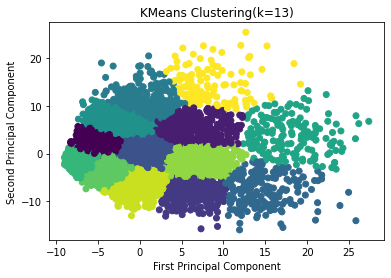

ARI=0.15582609940818834


In [7]:
max_clustered = X_clustered
max_n = 3
max_ari = ari
for i in range(4,21):
    kmeans = KMeans(n_clusters=i)
    X_clustered = kmeans.fit_predict(X_2D)
    ari = sklearn.metrics.adjusted_rand_score(X_clustered,y)
    print(f"{i}:{ari}")
    if ari > max_ari:
        max_clustered=X_clustered
        max_n = i
        max_ari = ari
plt.scatter(x,z,c=max_clustered)
plt.title(f'KMeans Clustering(k={max_n})')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
print(f"ARI={max_ari}")